In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import datetime as dt
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.chdir("D:\\JAR LAKUG\\musshy bear\\februari 2020\\cleaning anad regression")

In [3]:
data1=pd.read_csv("Summary of Weather.csv",delimiter=",", error_bad_lines=False)

In [4]:
data2=pd.read_csv("Weather Station Locations.csv",delimiter=",", error_bad_lines=False)

# joint data

In [5]:
weather= data1.merge(data2, right_on='WBAN', left_on='STA', how='left')
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,RVG,WTE,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3


# checking data categories

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 39 columns):
STA                 119040 non-null int64
Date                119040 non-null object
Precip              119040 non-null object
WindGustSpd         532 non-null float64
MaxTemp             119040 non-null float64
MinTemp             119040 non-null float64
MeanTemp            119040 non-null float64
Snowfall            117877 non-null object
PoorWeather         34237 non-null object
YR                  119040 non-null int64
MO                  119040 non-null int64
DA                  119040 non-null int64
PRCP                117108 non-null object
DR                  533 non-null float64
SPD                 532 non-null float64
MAX                 118566 non-null float64
MIN                 118572 non-null float64
MEA                 118542 non-null float64
SNF                 117877 non-null object
SND                 5563 non-null float64
FT                  0 non-null floa

# delete data that has an object type and has the same definition

In [7]:
weather1=weather.drop(['ELEV','MAX', 'MIN', 'MEA','PRCP','SNF','STA','Date','PoorWeather','YR','MO','DA','SND','PGT','TSHDSBRSGF','RHX','RHN','WBAN','NAME','STATE/COUNTRY ID','LAT','LON'],axis=1)
weather1

,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,DR,SPD,FT,FB,FTI,ITH,SD3,RVG,WTE,Latitude,Longitude
0,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
1,0,NaN,28.888889,21.666667,25.555556,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
2,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
3,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
4,0,NaN,26.666667,21.666667,24.444444,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
5,0,NaN,26.666667,21.666667,24.444444,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
6,T,NaN,28.333333,22.777778,25.555556,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
7,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
8,T,NaN,27.222222,22.777778,25.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000
9,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,-0.300000


# detection of missing values

In [8]:
weather1.isnull().sum()

Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
DR             118507
SPD            118508
FT             119040
FB             119040
FTI            119040
ITH            119040
SD3            119040
RVG            119040
WTE            119040
Latitude            0
Longitude           0
dtype: int64

In [9]:
##delete variables that have a lot of missing values

In [10]:
weather2=weather1.drop(['FT','FB','FTI','ITH','SD3','RVG','WTE'],axis=1)
weather2

,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,DR,SPD,Latitude,Longitude
0,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,NaN,5.600000,-0.300000
1,0,NaN,28.888889,21.666667,25.555556,0,NaN,NaN,5.600000,-0.300000
2,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,NaN,5.600000,-0.300000
3,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,NaN,5.600000,-0.300000
4,0,NaN,26.666667,21.666667,24.444444,0,NaN,NaN,5.600000,-0.300000
5,0,NaN,26.666667,21.666667,24.444444,0,NaN,NaN,5.600000,-0.300000
6,T,NaN,28.333333,22.777778,25.555556,0,NaN,NaN,5.600000,-0.300000
7,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,NaN,5.600000,-0.300000
8,T,NaN,27.222222,22.777778,25.000000,0,NaN,NaN,5.600000,-0.300000
9,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,NaN,5.600000,-0.300000


# detection of missing values

In [11]:
weather2.isnull().sum()

Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
DR             118507
SPD            118508
Latitude            0
Longitude           0
dtype: int64

# delete variables that have a lot of missing values

In [12]:
weather3=weather2.drop(['WindGustSpd','DR','SPD'],axis=1)
weather3

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,Latitude,Longitude
0,1.016,25.555556,22.222222,23.888889,0,5.600000,-0.300000
1,0,28.888889,21.666667,25.555556,0,5.600000,-0.300000
2,2.54,26.111111,22.222222,24.444444,0,5.600000,-0.300000
3,2.54,26.666667,22.222222,24.444444,0,5.600000,-0.300000
4,0,26.666667,21.666667,24.444444,0,5.600000,-0.300000
5,0,26.666667,21.666667,24.444444,0,5.600000,-0.300000
6,T,28.333333,22.777778,25.555556,0,5.600000,-0.300000
7,3.556,26.666667,22.222222,24.444444,0,5.600000,-0.300000
8,T,27.222222,22.777778,25.000000,0,5.600000,-0.300000
9,3.556,25.555556,21.666667,23.333333,0,5.600000,-0.300000


# detection of missing values

In [13]:
weather3.isnull().sum()

Precip          0
MaxTemp         0
MinTemp         0
MeanTemp        0
Snowfall     1163
Latitude        0
Longitude       0
dtype: int64

# checking data categories

In [14]:
weather3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 7 columns):
Precip       119040 non-null object
MaxTemp      119040 non-null float64
MinTemp      119040 non-null float64
MeanTemp     119040 non-null float64
Snowfall     117877 non-null object
Latitude     119040 non-null float64
Longitude    119040 non-null float64
dtypes: float64(5), object(2)
memory usage: 7.3+ MB


# Precip and Snowfall variables should be of numeric type, but in the data frame it reads category. Then a unique value check must be performed

In [15]:
weather3.Precip.unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [16]:
weather3.Snowfall.unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

# delete rows that contain text on Snowfall, PRCP and SNF variables

In [17]:
weather3=weather3[weather3.Precip!="T"]
weather3=weather3[weather3.Snowfall!="#VALUE!"]

# convertion object to numeric

In [18]:
weather3.Precip=weather3.Precip.astype(float)
weather3.Snowfall=weather3.Snowfall.astype(float)

# checking data categories for variabel Precip, Snowfall

In [19]:
weather3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102264 entries, 0 to 119039
Data columns (total 7 columns):
Precip       102264 non-null float64
MaxTemp      102264 non-null float64
MinTemp      102264 non-null float64
MeanTemp     102264 non-null float64
Snowfall     101359 non-null float64
Latitude     102264 non-null float64
Longitude    102264 non-null float64
dtypes: float64(7)
memory usage: 6.2 MB


# detection of missing values

In [20]:
weather3.isnull().sum()

Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall     905
Latitude       0
Longitude      0
dtype: int64

In [21]:
weather3.dropna(inplace=True)

# detection of missing values

In [22]:
weather3.isnull().sum()

Precip       0
MaxTemp      0
MinTemp      0
MeanTemp     0
Snowfall     0
Latitude     0
Longitude    0
dtype: int64

In [23]:
weather3

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,Latitude,Longitude
0,1.016,25.555556,22.222222,23.888889,0.0,5.600000,-0.300000
1,0.000,28.888889,21.666667,25.555556,0.0,5.600000,-0.300000
2,2.540,26.111111,22.222222,24.444444,0.0,5.600000,-0.300000
3,2.540,26.666667,22.222222,24.444444,0.0,5.600000,-0.300000
4,0.000,26.666667,21.666667,24.444444,0.0,5.600000,-0.300000
5,0.000,26.666667,21.666667,24.444444,0.0,5.600000,-0.300000
7,3.556,26.666667,22.222222,24.444444,0.0,5.600000,-0.300000
9,3.556,25.555556,21.666667,23.333333,0.0,5.600000,-0.300000
10,0.000,25.555556,21.666667,23.333333,0.0,5.600000,-0.300000
11,0.508,24.444444,22.222222,23.333333,0.0,5.600000,-0.300000


In [24]:
weather3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101359 entries, 0 to 119039
Data columns (total 7 columns):
Precip       101359 non-null float64
MaxTemp      101359 non-null float64
MinTemp      101359 non-null float64
MeanTemp     101359 non-null float64
Snowfall     101359 non-null float64
Latitude     101359 non-null float64
Longitude    101359 non-null float64
dtypes: float64(7)
memory usage: 6.2 MB


# Correlation between Variables

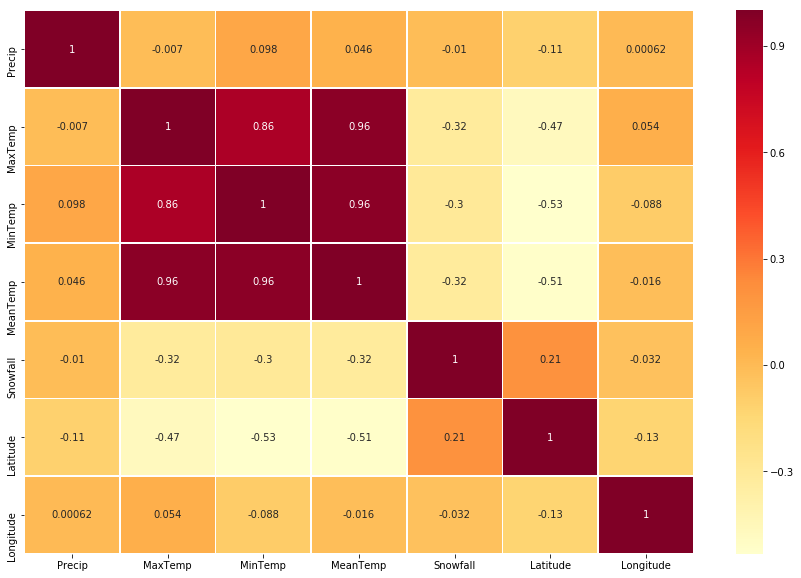

In [25]:
corr=weather3[["Precip","MaxTemp","MinTemp","MeanTemp","Snowfall","Latitude","Longitude"]].corr() 
import seaborn as sb 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(corr,annot=True, cmap="YlOrRd", linewidths=.5, ax=ax)

In [26]:
X = weather3[['MaxTemp', 'MinTemp', 'MeanTemp', 'Precip','Latitude','Longitude']]
Y = weather3[['Snowfall']]
print(X.columns)
print(Y.columns)

Index(['MaxTemp', 'MinTemp', 'MeanTemp', 'Precip', 'Latitude', 'Longitude'], dtype='object')
Index(['Snowfall'], dtype='object')


In [27]:
m = len(weather3.Snowfall)
x0 = np.ones(m)
X = np.array([x0,weather3.MaxTemp,weather3.MinTemp,weather3.MeanTemp,weather3.Precip,weather3.Latitude,weather3.Longitude]).T
# Initial Coefficients
B = np.array([0, 0, 0, 0,0,0,0 ])
Y = np.array(weather3.Snowfall)

# Cost and Gradient Descent Function

In [28]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

# Cost and Grad Calc

In [29]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

3.4554845726575834


In [30]:
# 100000 Iterations
alpha = 0.0001
iteration =1000
newB, cost_history = gradient_descent(X, Y, B, alpha, iteration)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[ 0.01315439  0.00912294 -0.02730779 -0.00851361  0.00850996  0.02819253
 -0.00062848]
3.211130314813264


# Model : Y = 0.01315439 + 0.00912294 MaxTemp - 0.02730779 MinTemp -0.00851361 MeanTemp + 0.00850996 Precip + 0.02819253 Latitude - 0.00062848 Longitude

# Cost Gradient Plot

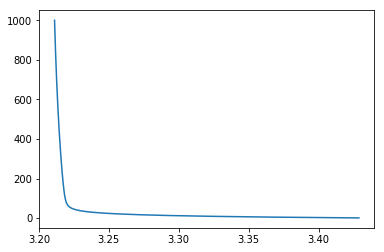

In [31]:
z=pd.DataFrame(cost_history)
z[iter]=np.arange(1,1001,1)
z.columns=['cost','iter']
plt.plot(z.cost,z.iter)

# RMSE and R2

In [32]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print("RMSE : " + str(rmse(Y, Y_pred)))
print("R2 : " + str(r2_score(Y, Y_pred)))

RMSE : 2.534217952273737
R2 : 0.06344283411453011


# Scikit Learn

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print("RMSE : " + str(rmse))
print("R2 : " + str(r2))
print("Ceof :" + str(reg.coef_))

RMSE : 2.47123567718778
R2 : 0.10941639588983765
Ceof :[ 0.         -0.10579026 -0.06194059  0.06940039  0.00044883  0.00732917
 -0.00057608]
